In [19]:
# 1. Import Libraries and Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
# 2. Data Cleaning and Preparation

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

df_countries = df.dropna(subset=['country']).copy()
df_countries['country_list'] = df_countries['country'].str.split(', ')
df_exploded_countries = df_countries.explode('country_list')

print("Data cleaning complete.")
print("Original Shape:", df.shape)
print("Shape after cleaning and exploding countries:", df_exploded_countries.shape)

Data cleaning complete.
Original Shape: (8807, 13)
Shape after cleaning and exploding countries: (10014, 14)


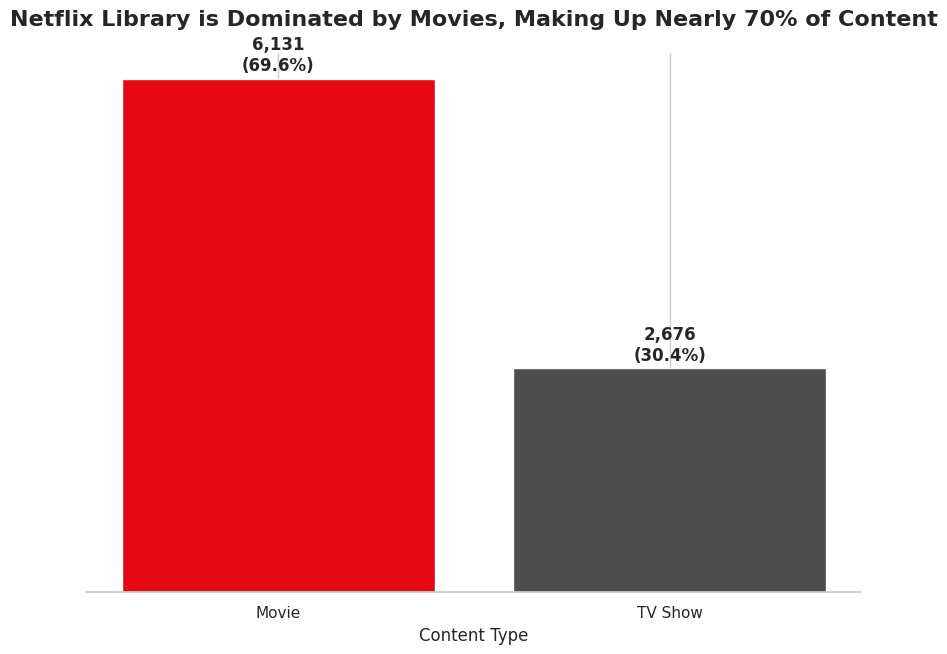

In [21]:
# 3. Analysis: Movie vs. TV Show Distribution

type_counts = df['type'].value_counts()
type_percentages = df['type'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(10, 7))
colors = ['#E50914', '#4d4d4d']
ax.bar(type_counts.index, type_counts.values, color=colors)

for i, count in enumerate(type_counts.values):
    percentage = type_percentages.values[i]
    label = f'{count:,.0f}\n({percentage:.1f}%)'
    ax.text(i, count + 50, label, ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_yticks([])
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_title('Netflix Library is Dominated by Movies, Making Up Nearly 70% of Content', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Content Type', fontsize=12)
plt.savefig('chart1.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-4161371211.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_countries.values, x=top_10_countries.index, palette="viridis")


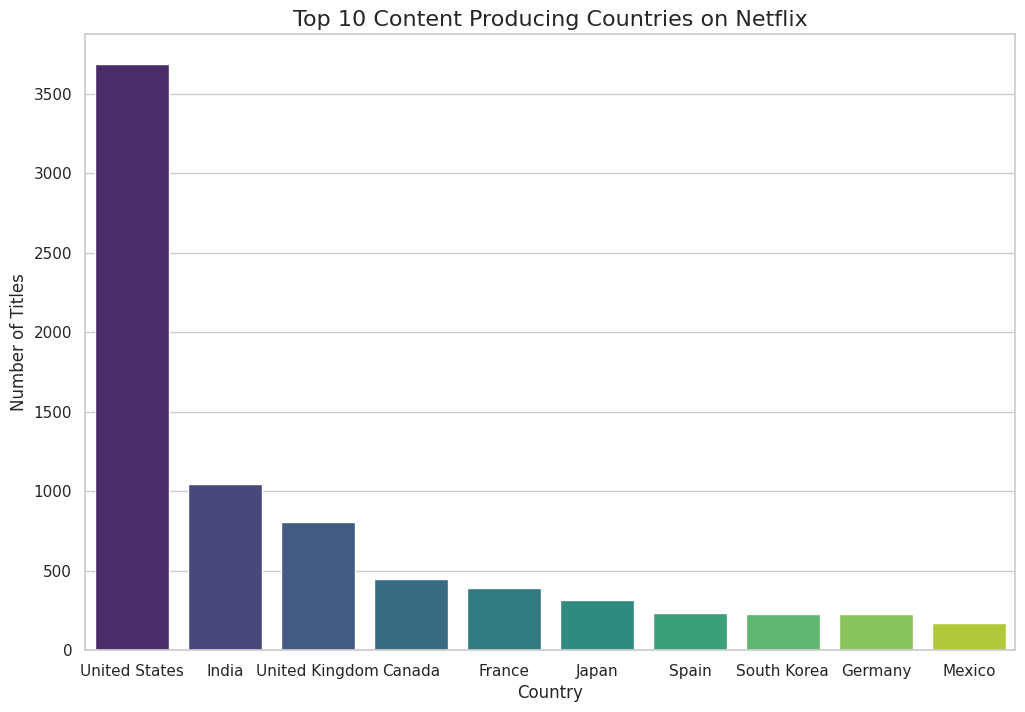

In [22]:
# 4. Analysis: Top 10 Content Producing Countries

top_10_countries = df_exploded_countries['country_list'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(y=top_10_countries.values, x=top_10_countries.index, palette="viridis")
plt.title('Top 10 Content Producing Countries on Netflix', fontsize=16)
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.savefig('chart2.png', dpi=300, bbox_inches='tight')
plt.show()

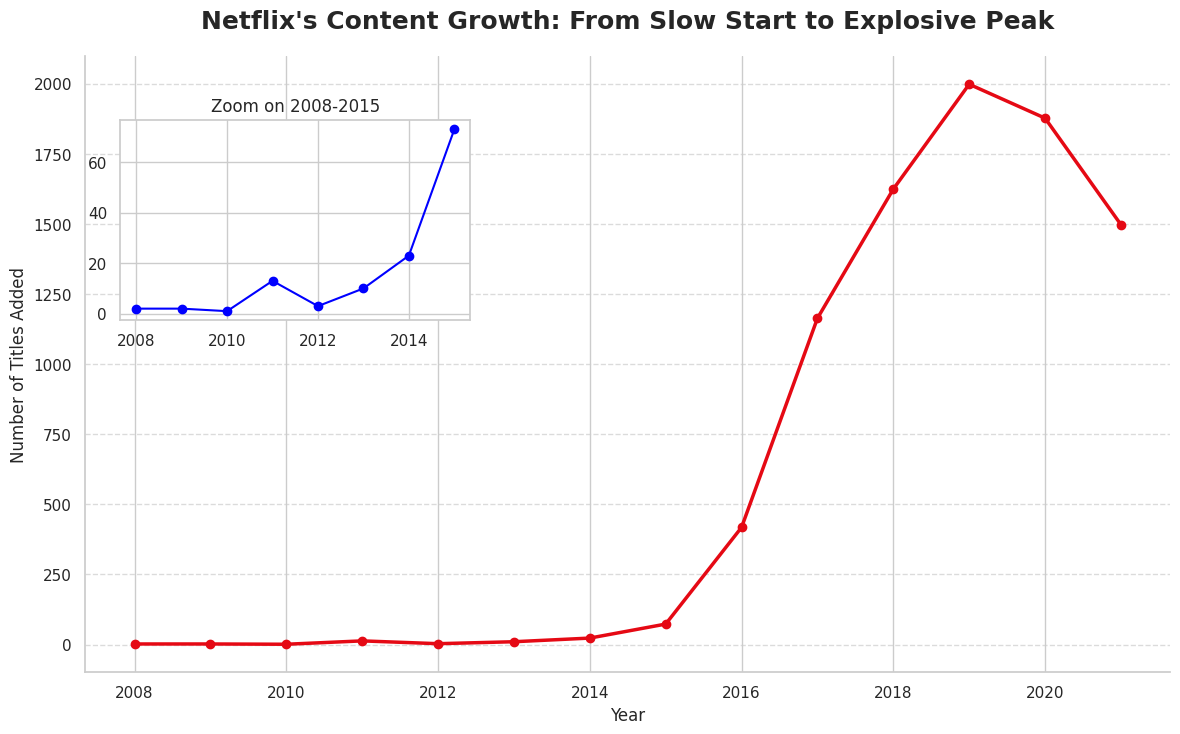

In [23]:
# 5. Analysis: Content Growth Over Time

content_by_year = df['year_added'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(content_by_year.index, content_by_year.values, marker='o', linestyle='-', color='#E50914', linewidth=2.5)
ax.set_title("Netflix's Content Growth: From Slow Start to Explosive Peak", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Titles Added')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines[['top', 'right']].set_visible(False)

# Inset axes for zoom
ax_inset = fig.add_axes([0.15, 0.55, 0.25, 0.25])
early_years = content_by_year.loc[2008:2015]
ax_inset.plot(early_years.index, early_years.values, marker='o', linestyle='-', color='blue')
ax_inset.set_title('Zoom on 2008-2015')
plt.savefig('chart3.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-2429744479.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')


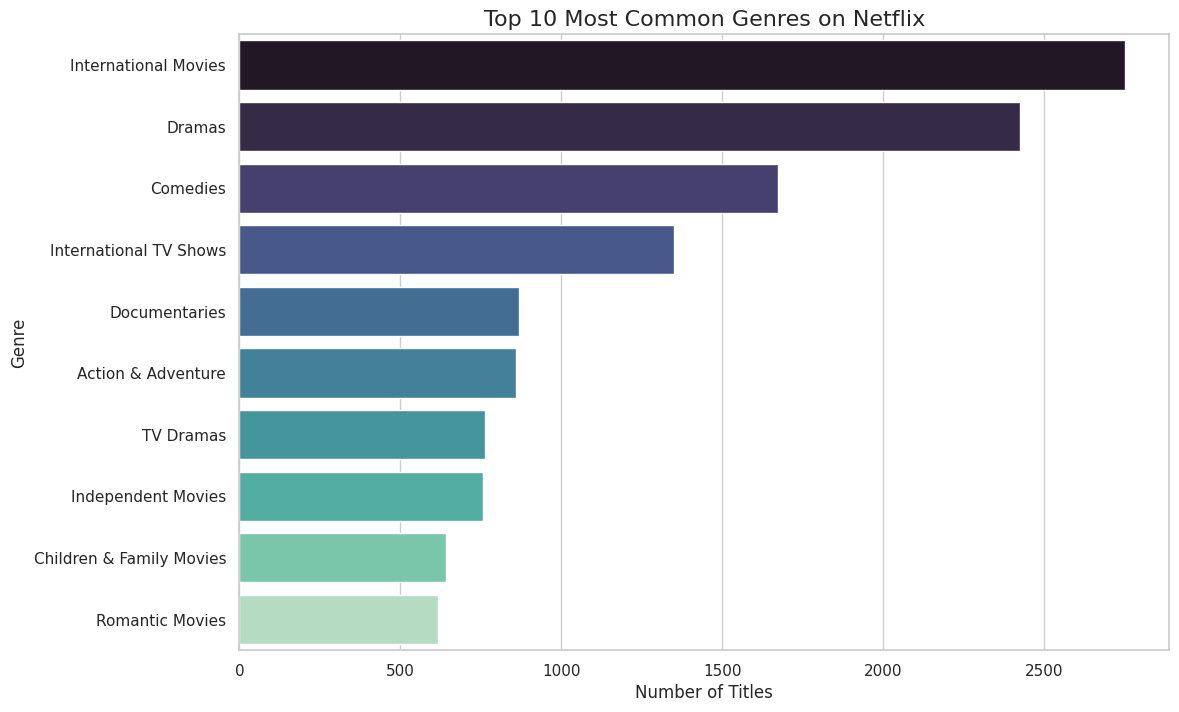

In [24]:
# 6. Analysis: Top 10 Most Common Genres

df_genres = df.dropna(subset=['listed_in']).copy()
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres_exploded = df_genres.explode('genre')
top_10_genres = df_genres_exploded['genre'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.savefig('chart4.png', dpi=300, bbox_inches='tight')
plt.show()